#Cleaned Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv('/Users/sohnikareddy/Desktop/capstone project/data/orders_and_shipments.csv')

In [9]:
df.columns = df.columns.str.strip()

In [10]:
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 Order ID                     0
Order Item ID                0
Order YearMonth              0
Order Year                   0
Order Month                  0
Order Day                    0
Order Time                   0
Order Quantity               0
Product Department           0
Product Category             0
Product Name                 0
Customer ID                  0
Customer Market              0
Customer Region              0
Customer Country             0
Warehouse Country            0
Shipment Year                0
Shipment Month               0
Shipment Day                 0
Shipment Mode                0
Shipment Days - Scheduled    0
Gross Sales                  0
Discount %                   0
Profit                       0
dtype: int64


In [11]:
print(df.columns)


Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit'],
      dtype='object')


In [8]:
duplicates_before = df.duplicated(subset=['Order ID', 'Order Item ID']).sum()
print(f"\nNumber of duplicate rows before cleaning: {duplicates_before}")


Number of duplicate rows before cleaning: 0


In [12]:
df['Order Quantity'].fillna(df['Order Quantity'].mean(), inplace=True)

In [30]:
df['Discount %'] = df['Discount %'].astype(str).str.strip()
dash_count = (df['Discount %'] == '-').sum()
zero_count = ((df['Discount %'] == '0') | (df['Discount %'].astype(float) == 0)).sum()
print(f"Number of '-' values in the 'Discount %' column: {dash_count}")
print(f"Number of '0' values in the 'Discount %' column: {zero_count}")

Number of '-' values in the 'Discount %' column: 0
Number of '0' values in the 'Discount %' column: 1749


In [31]:
df['Discount %'] = df['Discount %'].replace(['-', '  -  ', ''], '0')
df['Discount %'] = df['Discount %'].str.replace('%', '').str.strip()
df['Discount %'] = pd.to_numeric(df['Discount %'], errors='coerce')
df['Discount %'].fillna(0, inplace=True)

In [32]:
print(df['Discount %'].head())

0    0.25
1    0.09
2    0.06
3    0.15
4    0.13
Name: Discount %, dtype: float64


In [33]:
df['Shipment Days - Scheduled'].fillna(df['Shipment Days - Scheduled'].mean(), inplace=True)

In [34]:
df.drop_duplicates(subset=['Order ID', 'Order Item ID'], inplace=True)


In [35]:
df['Gross Sales'] = pd.to_numeric(df['Gross Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [36]:
missing_values_after = df.isnull().sum()

In [37]:
print("\nMissing values after cleaning:")
print(missing_values_after)


Missing values after cleaning:
Order ID                     0
Order Item ID                0
Order YearMonth              0
Order Year                   0
Order Month                  0
Order Day                    0
Order Time                   0
Order Quantity               0
Product Department           0
Product Category             0
Product Name                 0
Customer ID                  0
Customer Market              0
Customer Region              0
Customer Country             0
Warehouse Country            0
Shipment Year                0
Shipment Month               0
Shipment Day                 0
Shipment Mode                0
Shipment Days - Scheduled    0
Gross Sales                  0
Discount %                   0
Profit                       0
dtype: int64


In [38]:
print(df['Discount %'].head())

0    0.25
1    0.09
2    0.06
3    0.15
4    0.13
Name: Discount %, dtype: float64


In [39]:
duplicates_after = df.duplicated(subset=['Order ID', 'Order Item ID']).sum()
print(f"\nNumber of duplicate rows after cleaning: {duplicates_after}")


Number of duplicate rows after cleaning: 0


In [40]:
print("\nCleaned Dataframe Info:")
df.info()
df.to_csv('cleaned_orders_and_shipments.csv', index=False)


Cleaned Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Order ID                   30871 non-null  int64  
 1   Order Item ID              30871 non-null  int64  
 2   Order YearMonth            30871 non-null  int64  
 3   Order Year                 30871 non-null  int64  
 4   Order Month                30871 non-null  int64  
 5   Order Day                  30871 non-null  int64  
 6   Order Time                 30871 non-null  object 
 7   Order Quantity             30871 non-null  int64  
 8   Product Department         30871 non-null  object 
 9   Product Category           30871 non-null  object 
 10  Product Name               30871 non-null  object 
 11  Customer ID                30871 non-null  int64  
 12  Customer Market            30871 non-null  object 
 13  Customer Region      

# Exploratory Data Analysis

In [3]:
import pandas as pd
df= pd.read_csv('/Users/sohnikareddy/Desktop/capstone project/data/cleaned_orders_and_shipments.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Order ID                   30871 non-null  int64  
 1   Order Item ID              30871 non-null  int64  
 2   Order YearMonth            30871 non-null  int64  
 3   Order Year                 30871 non-null  int64  
 4   Order Month                30871 non-null  int64  
 5   Order Day                  30871 non-null  int64  
 6   Order Time                 30871 non-null  object 
 7   Order Quantity             30871 non-null  int64  
 8   Product Department         30871 non-null  object 
 9   Product Category           30871 non-null  object 
 10  Product Name               30871 non-null  object 
 11  Customer ID                30871 non-null  int64  
 12  Customer Market            30871 non-null  object 
 13  Customer Region            30871 non-null  obj

In [4]:
df.describe()
missing_values= df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Order ID                     0
Order Item ID                0
Order YearMonth              0
Order Year                   0
Order Month                  0
Order Day                    0
Order Time                   0
Order Quantity               0
Product Department           0
Product Category             0
Product Name                 0
Customer ID                  0
Customer Market              0
Customer Region              0
Customer Country             0
Warehouse Country            0
Shipment Year                0
Shipment Month               0
Shipment Day                 0
Shipment Mode                0
Shipment Days - Scheduled    0
Gross Sales                  0
Discount %                   0
Profit                       0
dtype: int64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


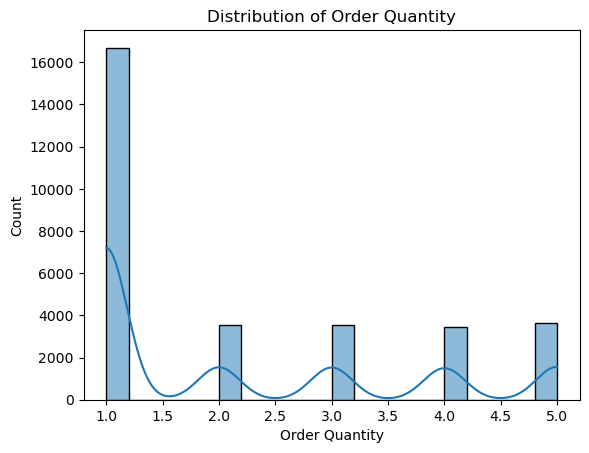

In [6]:
# Distribution of Order Quantity
sns.histplot(df['Order Quantity'], bins=20, kde=True)
plt.title("Distribution of Order Quantity")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


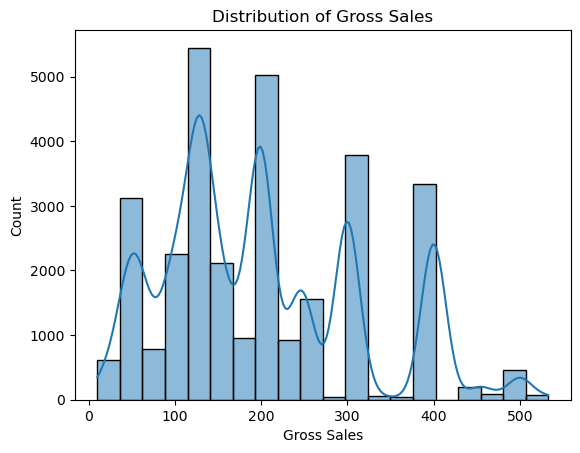

In [9]:
sns.histplot(df['Gross Sales'], bins=20, kde=True)
plt.title("Distribution of Gross Sales")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


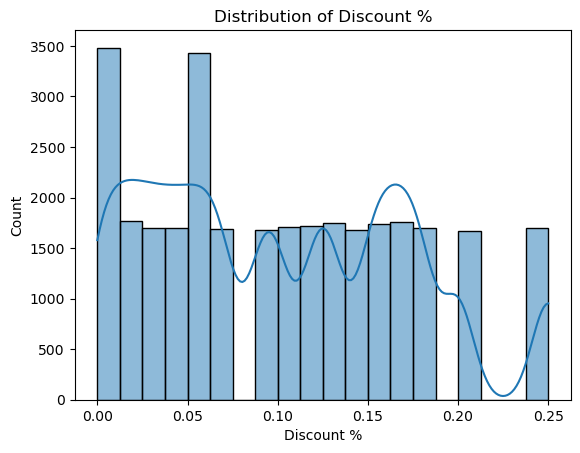

In [10]:
sns.histplot(df['Discount %'], bins=20, kde=True)
plt.title("Distribution of Discount %")
plt.show()

correlation analysis

In [14]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [15]:
print("Numeric columns selected for correlation:")
print(numeric_df.dtypes)

Numeric columns selected for correlation:
Order ID                       int64
Order Item ID                  int64
Order YearMonth                int64
Order Year                     int64
Order Month                    int64
Order Day                      int64
Order Quantity                 int64
Customer ID                    int64
Shipment Year                  int64
Shipment Month                 int64
Shipment Day                   int64
Shipment Days - Scheduled      int64
Gross Sales                    int64
Discount %                   float64
Profit                         int64
dtype: object


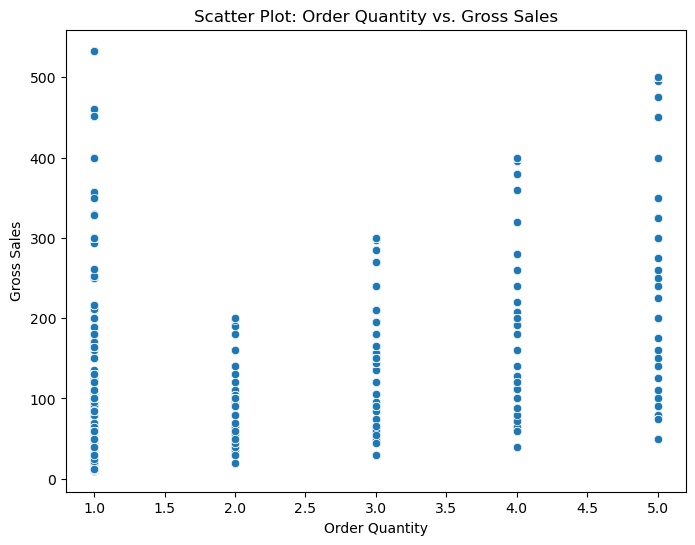

In [22]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Order Quantity', y='Gross Sales')
plt.title('Scatter Plot: Order Quantity vs. Gross Sales')
plt.show()


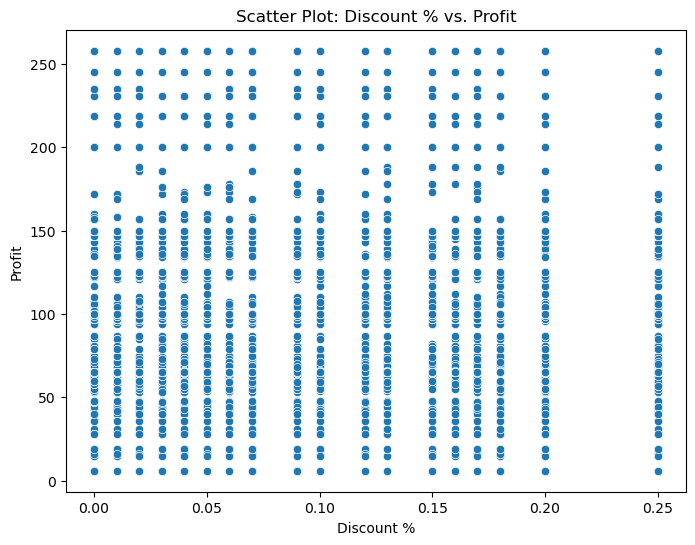

In [23]:
# Scatter plot for Discount % vs Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount %', y='Profit')
plt.title('Scatter Plot: Discount % vs. Profit')
plt.xlabel('Discount %')
plt.ylabel('Profit')
plt.show()

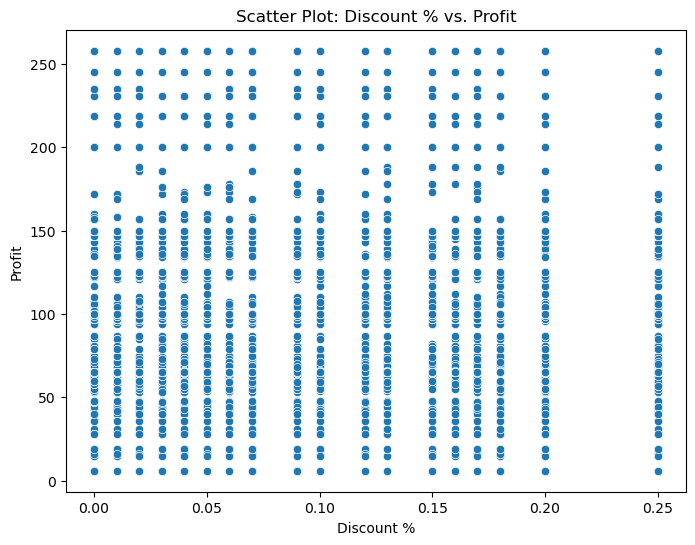

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount %', y='Profit')
plt.title('Scatter Plot: Discount % vs. Profit')
plt.xlabel('Discount %')
plt.ylabel('Profit')
plt.show()

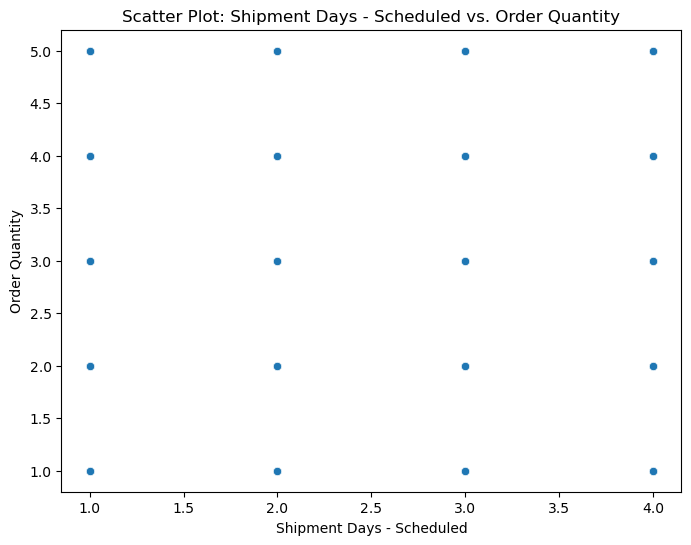

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Shipment Days - Scheduled', y='Order Quantity')
plt.title('Scatter Plot: Shipment Days - Scheduled vs. Order Quantity')
plt.xlabel('Shipment Days - Scheduled')
plt.ylabel('Order Quantity')
plt.show()

Lead time Analysis

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/Users/sohnikareddy/Desktop/capstone project/data/cleaned_orders_and_shipments.csv')
df.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Customer Country,Warehouse Country,Shipment Year,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,2,27,Standard Class,4,400,0.25,200
1,4133,10320,201503,2015,3,2,07:37,1,Fan Shop,Fishing,...,Brazil,Puerto Rico,2015,3,6,Standard Class,4,400,0.09,200
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,Mexico,Puerto Rico,2015,4,20,Standard Class,4,400,0.06,200
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.15,200
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,Denmark,Puerto Rico,2015,6,12,Standard Class,4,400,0.13,200


In [31]:
print(df.columns)

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit'],
      dtype='object')


In [32]:
df.columns = df.columns.str.strip() 

In [38]:
print(df.columns.tolist())

['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year', 'Order Month', 'Order Day', 'Order Time', 'Order Quantity', 'Product Department', 'Product Category', 'Product Name', 'Customer ID', 'Customer Market', 'Customer Region', 'Customer Country', 'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day', 'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales', 'Discount %', 'Profit']


In [39]:
df.rename(columns={
    'Order Year': 'Order_Year',
    'Order Month': 'Order_Month',
    'Order Day': 'Order_Day',
    'Shipment Year': 'Shipment_Year',
    'Shipment Month': 'Shipment_Month',
    'Shipment Day': 'Shipment_Day'
}, inplace=True)

In [36]:
df['Order Year'] = pd.to_numeric(df['Order Year'], errors='coerce')
df['Order Month'] = pd.to_numeric(df['Order Month'], errors='coerce')
df['Order Day'] = pd.to_numeric(df['Order Day'], errors='coerce')
df['Shipment Year'] = pd.to_numeric(df['Shipment Year'], errors='coerce')
df['Shipment Month'] = pd.to_numeric(df['Shipment Month'], errors='coerce')
df['Shipment Day'] = pd.to_numeric(df['Shipment Day'], errors='coerce')

In [44]:
df['Order_Year'] = df['Order_Year'].astype('Int64')  # Using 'Int64' to handle any missing values if they exist
df['Order_Month'] = df['Order_Month'].astype('Int64')
df['Order_Day'] = df['Order_Day'].astype('Int64')
df['Shipment_Year'] = df['Shipment_Year'].astype('Int64')
df['Shipment_Month'] = df['Shipment_Month'].astype('Int64')
df['Shipment_Day'] = df['Shipment_Day'].astype('Int64')

In [41]:
print("Missing values in Order Date components:")
print(df[['Order_Year', 'Order_Month', 'Order_Day']].isnull().sum())

print("Missing values in Shipment Date components:")
print(df[['Shipment_Year', 'Shipment_Month', 'Shipment_Day']].isnull().sum())

Missing values in Order Date components:
Order_Year     0
Order_Month    0
Order_Day      0
dtype: int64
Missing values in Shipment Date components:
Shipment_Year     0
Shipment_Month    0
Shipment_Day      0
dtype: int64


In [42]:
df.dropna(subset=['Order_Year', 'Order_Month', 'Order_Day', 'Shipment_Year', 'Shipment_Month', 'Shipment_Day'], inplace=True)

In [47]:
df['Order Date'] = pd.to_datetime(df['Order_Year'].astype(str) + '-' + 
                                  df['Order_Month'].astype(str) + '-' + 
                                  df['Order_Day'].astype(str), errors='coerce')

df['Shipment Date'] = pd.to_datetime(df['Shipment_Year'].astype(str) + '-' + 
                                     df['Shipment_Month'].astype(str) + '-' + 
                                     df['Shipment_Day'].astype(str), errors='coerce')


In [48]:
print(df[['Order Date', 'Shipment Date']].head())

  Order Date Shipment Date
0 2015-02-21    2015-02-27
1 2015-03-02    2015-03-06
2 2015-04-18    2015-04-20
3 2015-06-10    2015-06-12
4 2015-06-10    2015-06-12


In [49]:
df['Lead Time'] = (df['Shipment Date'] - df['Order Date']).dt.days

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


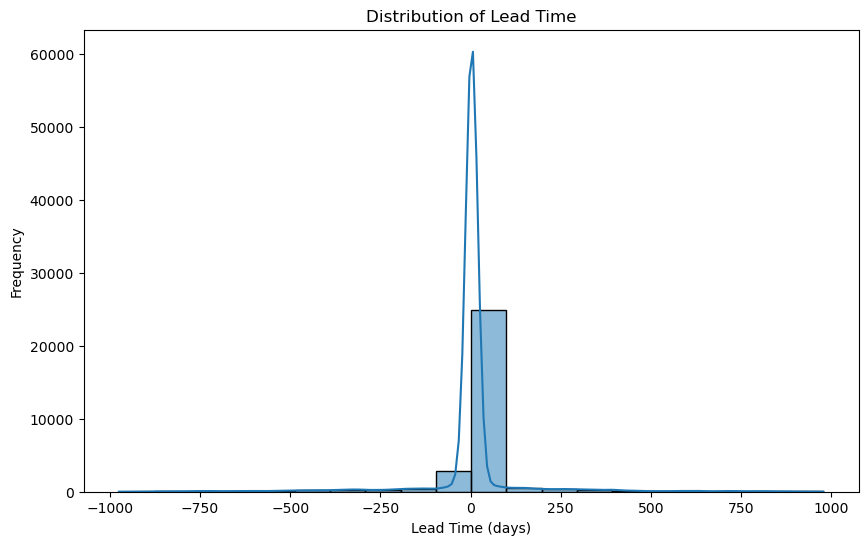

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Lead Time'], bins=20, kde=True)
plt.title("Distribution of Lead Time")
plt.xlabel("Lead Time (days)")
plt.ylabel("Frequency")
plt.show()

In [51]:
supplier_lead_time = df.groupby('Customer Country')['Lead Time'].agg(['mean', 'std', 'count'])

In [52]:
supplier_lead_time['Consistency'] = pd.cut(supplier_lead_time['std'], bins=[0, 2, 5, float('inf')],
                                           labels=['Consistent', 'Moderate', 'Variable'])

In [53]:
print(supplier_lead_time)

                       mean         std  count Consistency
Customer Country                                          
Afghanistan       13.574468   91.309732     47    Variable
Albania           14.937500   27.689875     16    Variable
Algeria�         -30.885057  128.490831     87    Variable
Angola             1.244898   44.087758     49    Variable
Argentina         19.056452  136.439355    372    Variable
...                     ...         ...    ...         ...
Venezuela         23.521531  228.168019    209    Variable
Vietnam           23.286822  117.312163    129    Variable
Yemen             18.500000   58.603951     14    Variable
Zambia            18.766667   50.238876     60    Variable
Zimbabwe         -15.000000   60.263524     14    Variable

[139 rows x 4 columns]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


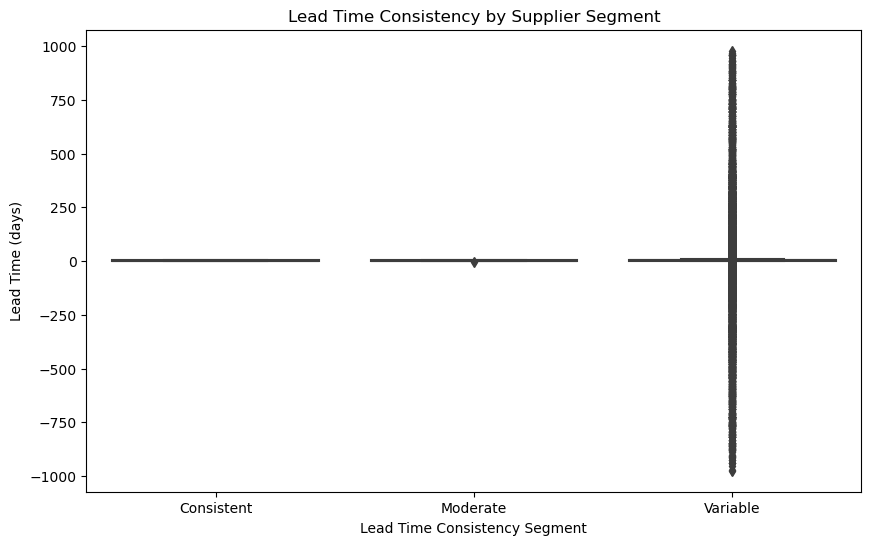

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Consistency', y='Lead Time', data=df.merge(supplier_lead_time, left_on='Customer Country', right_index=True))
plt.title("Lead Time Consistency by Supplier Segment")
plt.xlabel("Lead Time Consistency Segment")
plt.ylabel("Lead Time (days)")
plt.show()


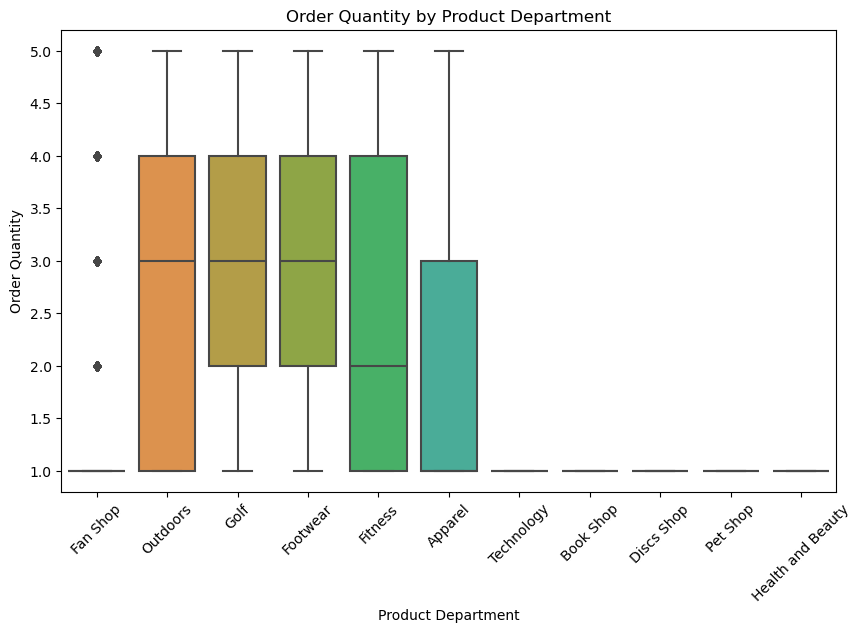

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product Department', y='Order Quantity', data=df)
plt.title("Order Quantity by Product Department")
plt.xlabel("Product Department")
plt.ylabel("Order Quantity")
plt.xticks(rotation=45)
plt.show()

In [56]:
top_sales_products = df.groupby('Product Name')['Gross Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Gross Sales:\n", top_sales_products)

Top 10 Products by Gross Sales:
 Product Name
Field & Stream Sportsman 16 Gun Fire Safe        1151200
Perfect Fitness Perfect Rip Deck                  777120
Diamondback Women's Serene Classic Comfort Bi     728100
Nike Men's Free 5.0+ Running Shoe                 645500
Nike Men's Dri-FIT Victory Golf Polo              544300
Pelican Sunstream 100 Kayak                       536200
O'Brien Men's Neoprene Life Vest                  508200
Nike Men's CJ Elite 2 TD Football Cleat           501150
Under Armour Girls' Toddler Spine Surge Runni     227560
Web Camera                                         86332
Name: Gross Sales, dtype: int64


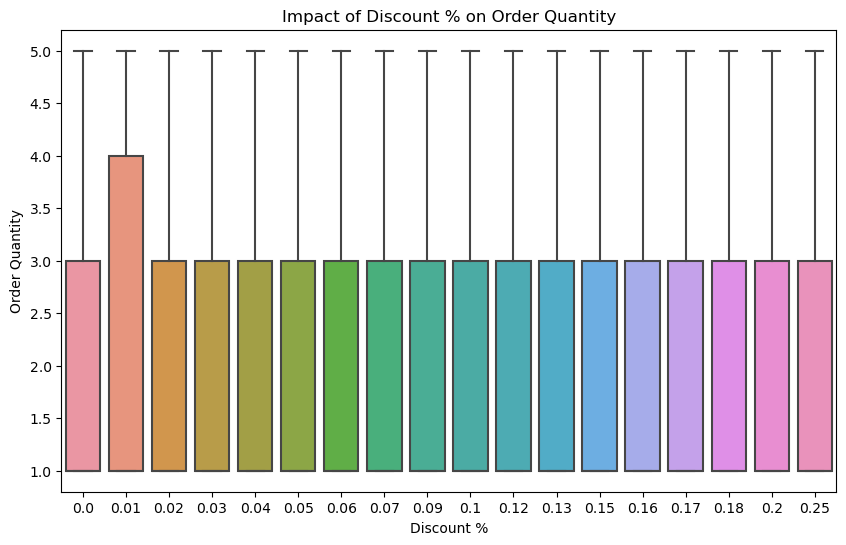

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount %', y='Order Quantity', data=df)
plt.title("Impact of Discount % on Order Quantity")
plt.xlabel("Discount %")
plt.ylabel("Order Quantity")
plt.show()

In [60]:
print(supplier_lead_time.columns)

Index(['mean', 'std', 'count', 'Consistency'], dtype='object')


In [58]:
def reliability_category(std_dev):
    if std_dev <= 2:
        return 'Reliable'
    elif std_dev <= 5:
        return 'Moderate'
    else:
        return 'Inconsistent'

In [61]:
supplier_lead_time['Reliability'] = supplier_lead_time['std'].apply(reliability_category)

In [62]:
print(supplier_lead_time[['mean', 'std', 'count', 'Reliability']].head())

                       mean         std  count   Reliability
Customer Country                                            
Afghanistan       13.574468   91.309732     47  Inconsistent
Albania           14.937500   27.689875     16  Inconsistent
Algeria�         -30.885057  128.490831     87  Inconsistent
Angola             1.244898   44.087758     49  Inconsistent
Argentina         19.056452  136.439355    372  Inconsistent


In [63]:
def safety_stock_multiplier(reliability):
    if reliability == 'Reliable':
        return 1.1  
    elif reliability == 'Moderate':
        return 1.3 
    else:
        return 1.5 

In [65]:
supplier_lead_time['Safety Stock Level'] = supplier_lead_time['mean'] * supplier_lead_time['Consistency'].apply(safety_stock_multiplier)

In [66]:
print(supplier_lead_time[['mean', 'std', 'count', 'Consistency', 'Safety Stock Level']].head())

                       mean         std  count Consistency  Safety Stock Level
Customer Country                                                              
Afghanistan       13.574468   91.309732     47    Variable           20.361702
Albania           14.937500   27.689875     16    Variable           22.406250
Algeria�         -30.885057  128.490831     87    Variable          -46.327586
Angola             1.244898   44.087758     49    Variable            1.867347
Argentina         19.056452  136.439355    372    Variable           28.584677


Order date and shipment date

In [67]:
import pandas as pd
df= pd.read_csv('/Users/sohnikareddy/Desktop/capstone project/data/cleaned_orders_and_shipments.csv')

In [69]:
print(df.columns)


Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit'],
      dtype='object')


In [70]:
df.columns = df.columns.str.strip()

In [73]:
df['Order Date'] = pd.to_datetime(df['Order Year'].astype(str) + '-' +
                                  df['Order Month'].astype(str) + '-' +
                                  df['Order Day'].astype(str))
df['Shipment Date'] = pd.to_datetime(df['Shipment Year'].astype(str) + '-' +
                                     df['Shipment Month'].astype(str) + '-' +
                                     df['Shipment Day'].astype(str))

In [74]:
df['Lead Time'] = (df['Shipment Date'] - df['Order Date']).dt.days

In [75]:
print(df[['Order Date', 'Shipment Date', 'Lead Time']].head())

  Order Date Shipment Date  Lead Time
0 2015-02-21    2015-02-27          6
1 2015-03-02    2015-03-06          4
2 2015-04-18    2015-04-20          2
3 2015-06-10    2015-06-12          2
4 2015-06-10    2015-06-12          2


In [78]:
df.to_csv('updated_orders_and_shipments_with_lead_time.csv', index=False)

In [79]:
import pandas as pd
file_path= '/Users/sohnikareddy/Desktop/capstone project/data/updated_orders_and_shipments_with_lead_time.csv'
df = pd.read_csv(file_path)
df.head()

In [80]:
negative_lead_times = df[df['Lead Time'] < 0]
print(f"Number of records with negative lead times: {negative_lead_times.shape[0]}")
negative_lead_times.head()

Number of records with negative lead times: 2880


,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Shipment Month,Shipment Day,Shipment Mode,Shipment Days - Scheduled,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Lead Time
294,2768,6944,201502,2015,2,10,9:24,1,Fan Shop,Camping & Hiking,...,1,20,Second Class,2,300,0.10,150,2/10/15,1/20/15,-21
295,4135,10329,201503,2015,3,2,8:19,1,Fan Shop,Camping & Hiking,...,2,14,Second Class,2,300,0.25,150,3/2/15,2/14/15,-16
296,6395,16009,201504,2015,4,4,8:06,1,Fan Shop,Camping & Hiking,...,3,17,Second Class,2,300,0.20,150,4/4/15,3/17/15,-18
297,6538,16349,201504,2015,4,6,10:12,1,Fan Shop,Camping & Hiking,...,3,23,Second Class,2,300,0.09,150,4/6/15,3/23/15,-14
298,17878,44666,201509,2015,9,18,23:06,1,Fan Shop,Camping & Hiking,...,7,19,Second Class,2,300,0.01,150,9/18/15,7/19/15,-61


In [81]:
shipment_mode_analysis = negative_lead_times.groupby('Shipment Mode')['Lead Time'].count()
print(shipment_mode_analysis)

Shipment Mode
First Class        399
Same Day           213
Second Class       533
Standard Class    1735
Name: Lead Time, dtype: int64


In [82]:
warehouse_analysis = negative_lead_times.groupby('Warehouse Country')['Lead Time'].count()
print(warehouse_analysis)

Warehouse Country
Puerto Rico    1169
USA            1711
Name: Lead Time, dtype: int64


In [84]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Shipment Date'] = pd.to_datetime(df['Shipment Date'], errors='coerce')

/var/folders/s8/jl_2h7g16pv9cc4rq7nxxxgm0000gn/T/ipykernel_80898/1183136745.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
/var/folders/s8/jl_2h7g16pv9cc4rq7nxxxgm0000gn/T/ipykernel_80898/1183136745.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Shipment Date'] = pd.to_datetime(df['Shipment Date'], errors='coerce')


In [85]:
df['Lead Time'] = (df['Shipment Date'] - df['Order Date']).dt.days

In [86]:
df.loc[df['Lead Time'] < 0, ['Order Date', 'Shipment Date']] = df.loc[df['Lead Time'] < 0, ['Shipment Date', 'Order Date']].values
df['Lead Time'] = (df['Shipment Date'] - df['Order Date']).dt.days

In [87]:
negative_lead_times = df[df['Lead Time'] < 0]
print(f"Number of records with negative lead times: {negative_lead_times.shape[0]}")

Number of records with negative lead times: 0


In [88]:
df.to_excel('cleaned_lead_time_data.xlsx', index=False)
print("Cleaned data saved successfully.")

Cleaned data saved successfully.


In [2]:
import pandas as pd
file_path = '/Users/sohnikareddy/Desktop/capstone project/data/cleaned_lead_time_data.xlsx' 
df = pd.read_excel(file_path)

In [3]:
df['Order DateTime'] = pd.to_datetime(
    df['Order Date'].astype(str) + ' ' + df['Order Time'], errors='coerce'
)
df['Shipment DateTime'] = pd.to_datetime(df['Shipment Date'], errors='coerce')
df['Lead Time (Hours)'] = (df['Shipment DateTime'] - df['Order DateTime']).dt.total_seconds() / 3600

In [4]:
df['Lead Time (Days)'] = df['Lead Time (Hours)'] / 24
negative_lead_times = df[df['Lead Time (Hours)'] < 0]
print(f"Number of negative lead times: {negative_lead_times.shape[0]}")


Number of negative lead times: 890


In [5]:
negative_lead_time_rows = df[df['Lead Time (Hours)'] < 0]
print(negative_lead_time_rows[['Order DateTime', 'Shipment DateTime', 'Lead Time (Hours)']].head())

         Order DateTime Shipment DateTime  Lead Time (Hours)
43  2015-04-13 11:25:00        2015-04-13         -11.416667
121 2016-10-03 02:04:00        2016-10-03          -2.066667
122 2017-02-20 03:38:00        2017-02-20          -3.633333
205 2016-06-01 01:33:00        2016-06-01          -1.550000
218 2017-02-20 03:38:00        2017-02-20          -3.633333


In [6]:
df.loc[df['Lead Time (Hours)'] < 0, ['Order DateTime', 'Shipment DateTime']] = \
    df.loc[df['Lead Time (Hours)'] < 0, ['Shipment DateTime', 'Order DateTime']].values
df['Lead Time (Hours)'] = (df['Shipment DateTime'] - df['Order DateTime']).dt.total_seconds() / 3600

In [7]:
df = df[df['Lead Time (Hours)'] >= 0]


In [8]:
negative_lead_times_remaining = df[df['Lead Time (Hours)'] < 0]
print(f"Remaining negative lead times: {negative_lead_times_remaining.shape[0]}")

Remaining negative lead times: 0


In [9]:
df.to_csv('cleaned_lead_time_data.csv', index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


In [10]:
negative_lead_time = df[df['Lead Time (Days)'] < 0]
print(f"Number of negative lead times: {negative_lead_time.shape[0]}")
print(negative_lead_time[['Order Date', 'Shipment Date', 'Lead Time (Days)']].head())

Number of negative lead times: 890
    Order Date Shipment Date  Lead Time (Days)
43  2015-04-13    2015-04-13         -0.475694
121 2016-10-03    2016-10-03         -0.086111
122 2017-02-20    2017-02-20         -0.151389
205 2016-06-01    2016-06-01         -0.064583
218 2017-02-20    2017-02-20         -0.151389


In [11]:
df.loc[df['Lead Time (Days)'] < 0, ['Order Date', 'Shipment Date']] = \
    df.loc[df['Lead Time (Days)'] < 0, ['Shipment Date', 'Order Date']].values
df['Lead Time (Days)'] = (pd.to_datetime(df['Shipment Date']) - pd.to_datetime(df['Order Date'])).dt.days

In [12]:
remaining_negatives = df[df['Lead Time (Days)'] < 0]
print(f"Remaining negative lead times: {remaining_negatives.shape[0]}")

Remaining negative lead times: 0


In [13]:
df.to_csv('final_cleaned_lead_time_data.csv', index=False)
print("Final cleaned dataset saved successfully.")

Final cleaned dataset saved successfully.


In [1]:
import pandas as pd

In [2]:
file_path = '/Users/sohnikareddy/Desktop/capstone project/data/final_cleaned_lead_time_data.csv'
lead_time_data = pd.read_csv(file_path)
lead_time_data.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Lead Time,Order DateTime,Shipment DateTime,Lead Time (Hours),Lead Time (Days)
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,400,0.25,200,2/21/15,2/27/15,6,2/21/15 14:07,2/27/15 0:00,129.883333,6
1,4133,10320,201503,2015,3,2,7:37,1,Fan Shop,Fishing,...,400,0.09,200,3/2/15,3/6/15,4,3/2/15 7:37,3/6/15 0:00,88.383333,4
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,400,0.06,200,4/18/15,4/20/15,2,4/18/15 22:47,4/20/15 0:00,25.216667,2
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,400,0.15,200,6/10/15,6/12/15,2,6/10/15 22:32,6/12/15 0:00,25.466667,2
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,400,0.13,200,6/10/15,6/12/15,2,6/10/15 22:32,6/12/15 0:00,25.466667,2


In [4]:
usa_warehouse_data = lead_time_data[lead_time_data['Warehouse Country'] == 'USA']
region_mapping = {
    'East of USA': 'East',
    'West of USA': 'West',
    'South of  USA': 'South',
    'US Center': 'Central'
}

In [5]:
usa_warehouse_data['USA Region'] = usa_warehouse_data['Customer Region'].map(region_mapping)
usa_warehouse_data = usa_warehouse_data.dropna(subset=['USA Region'])

/var/folders/s8/jl_2h7g16pv9cc4rq7nxxxgm0000gn/T/ipykernel_71982/2841124833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_warehouse_data['USA Region'] = usa_warehouse_data['Customer Region'].map(region_mapping)


In [6]:
usa_region_stats = usa_warehouse_data.groupby('USA Region')['Lead Time (Days)'].describe()
print(usa_region_stats)

            count       mean        std  min  25%  50%   75%    max
USA Region                                                         
Central     662.0  15.072508  42.191597  0.0  2.0  4.0  5.75  362.0
East        752.0  16.283245  44.328976  0.0  2.0  4.0  6.00  364.0
South       435.0  17.533333  45.395047  0.0  2.0  4.0  6.00  360.0
West        825.0  17.572121  46.997004  0.0  2.0  4.0  6.00  364.0


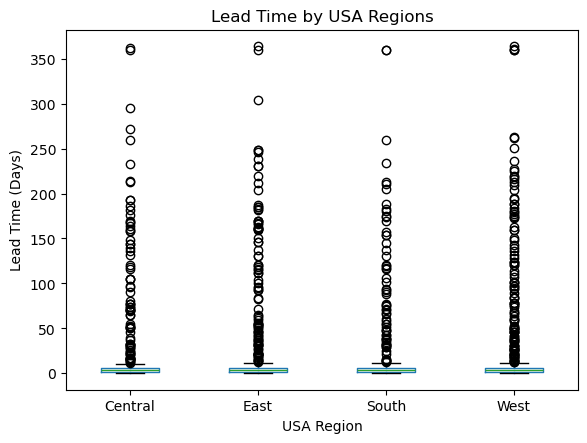

In [7]:
import matplotlib.pyplot as plt
usa_warehouse_data.boxplot(column='Lead Time (Days)', by='USA Region', grid=False)
plt.title('Lead Time by USA Regions')
plt.suptitle('')
plt.xlabel('USA Region')
plt.ylabel('Lead Time (Days)')
plt.show()


In [8]:
usa_region_stats.to_csv('usa_region_lead_time_stats.csv', index=True)

combined analysis for ware house

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
usa_data = lead_time_data[lead_time_data['Warehouse Country'] == 'USA']
puerto_rico_data = lead_time_data[lead_time_data['Warehouse Country'] == 'Puerto Rico']

In [11]:
puerto_rico_data['Region'] = 'Puerto Rico'
region_mapping = {
    'East of USA': 'East',
    'West of USA': 'West',
    'South of  USA': 'South',
    'US Center': 'Central'
}
usa_data['Region'] = usa_data['Customer Region'].map(region_mapping)
usa_data = usa_data.dropna(subset=['Region'])
combined_data = pd.concat([usa_data, puerto_rico_data], ignore_index=True)

/var/folders/s8/jl_2h7g16pv9cc4rq7nxxxgm0000gn/T/ipykernel_71982/2854137572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puerto_rico_data['Region'] = 'Puerto Rico'
/var/folders/s8/jl_2h7g16pv9cc4rq7nxxxgm0000gn/T/ipykernel_71982/2854137572.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['Region'] = usa_data['Customer Region'].map(region_mapping)


In [12]:
combined_stats = combined_data.groupby('Region')['Lead Time (Days)'].describe()

<Figure size 1000x600 with 0 Axes>

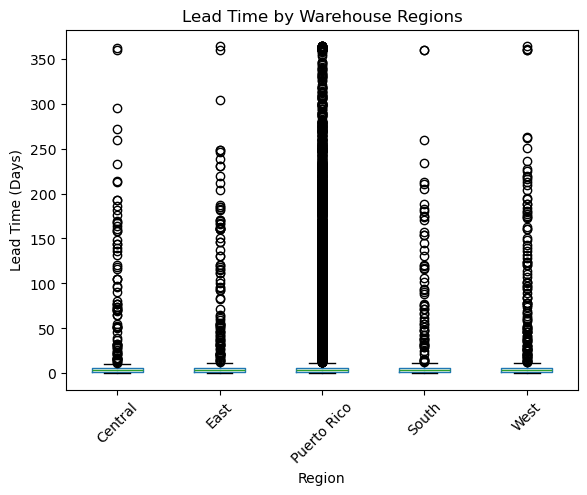

In [13]:
plt.figure(figsize=(10, 6))
combined_data.boxplot(column='Lead Time (Days)', by='Region', grid=False)
plt.title('Lead Time by Warehouse Regions')
plt.suptitle('')  # Suppress the automatic subplot title
plt.xlabel('Region')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.show()


In [14]:
combined_stats.to_csv('warehouse_lead_time_analysis.csv', index=True)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
file_path = '/Users/sohnikareddy/Desktop/capstone project/data/final_cleaned_lead_time_data.csv'
lead_time_data = pd.read_csv(file_path)
lead_time_data.head()

,Order ID,Order Item ID,Order YearMonth,Order Year,Order Month,Order Day,Order Time,Order Quantity,Product Department,Product Category,...,Gross Sales,Discount %,Profit,Order Date,Shipment Date,Lead Time,Order DateTime,Shipment DateTime,Lead Time (Hours),Lead Time (Days)
0,3535,8793,201502,2015,2,21,14:07,1,Fan Shop,Fishing,...,400,0.25,200,2/21/15,2/27/15,6,2/21/15 14:07,2/27/15 0:00,129.883333,6
1,4133,10320,201503,2015,3,2,7:37,1,Fan Shop,Fishing,...,400,0.09,200,3/2/15,3/6/15,4,3/2/15 7:37,3/6/15 0:00,88.383333,4
2,7396,18517,201504,2015,4,18,22:47,1,Fan Shop,Fishing,...,400,0.06,200,4/18/15,4/20/15,2,4/18/15 22:47,4/20/15 0:00,25.216667,2
3,11026,27608,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,400,0.15,200,6/10/15,6/12/15,2,6/10/15 22:32,6/12/15 0:00,25.466667,2
4,11026,27609,201506,2015,6,10,22:32,1,Fan Shop,Fishing,...,400,0.13,200,6/10/15,6/12/15,2,6/10/15 22:32,6/12/15 0:00,25.466667,2


In [1]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [8]:
filtered_data = remove_outliers(lead_time_data, 'Lead Time (Days)')

In [14]:
usa_data = filtered_data[filtered_data['Warehouse Country'] == 'USA']
puerto_rico_data = filtered_data[filtered_data['Warehouse Country'] == 'Puerto Rico']

In [15]:
region_mapping = {
    'East of USA': 'East',
    'West of USA': 'West',
    'South of  USA': 'South',
    'US Center': 'Central'
}
usa_data['Region'] = usa_data['Customer Region'].map(region_mapping)
usa_data = usa_data.dropna(subset=['Region'])

/var/folders/s8/jl_2h7g16pv9cc4rq7nxxxgm0000gn/T/ipykernel_80375/4044898075.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['Region'] = usa_data['Customer Region'].map(region_mapping)


In [16]:
puerto_rico_data['Region'] = 'Puerto Rico'

/var/folders/s8/jl_2h7g16pv9cc4rq7nxxxgm0000gn/T/ipykernel_80375/723624412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puerto_rico_data['Region'] = 'Puerto Rico'


In [17]:
combined_data = pd.concat([usa_data, puerto_rico_data], ignore_index=True)
combined_stats = combined_data.groupby('Region')['Lead Time (Days)'].describe()

<Figure size 1000x600 with 0 Axes>

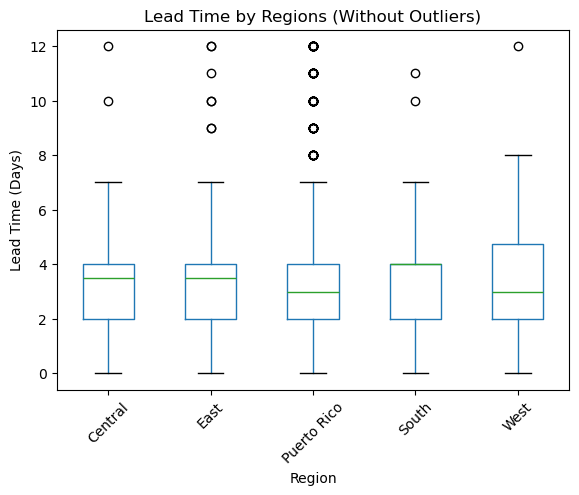

In [18]:
plt.figure(figsize=(10, 6))
combined_data.boxplot(column='Lead Time (Days)', by='Region', grid=False)
plt.title('Lead Time by Regions (Without Outliers)')
plt.suptitle('')  # Suppress the automatic subplot title
plt.xlabel('Region')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.show()


In [19]:
combined_stats.to_csv('lead_time_by_region_without_outliers.csv', index=True)

In [20]:
print(combined_stats)

              count      mean       std  min  25%  50%   75%   max
Region                                                            
Central       580.0  3.377586  1.617216  0.0  2.0  3.5  4.00  12.0
East          654.0  3.383792  1.805500  0.0  2.0  3.5  4.00  12.0
Puerto Rico  9816.0  3.280155  1.729301  0.0  2.0  3.0  4.00  12.0
South         370.0  3.429730  1.674512  0.0  2.0  4.0  4.00  11.0
West          706.0  3.395184  1.679557  0.0  2.0  3.0  4.75  12.0


In [4]:
import pandas as pd

In [87]:
data = pd.read_csv('/Users/sohnikareddy/Desktop/capstone project/data/final_cleaned_lead_time_data.csv')

In [88]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

/var/folders/s8/jl_2h7g16pv9cc4rq7nxxxgm0000gn/T/ipykernel_85049/3021409918.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


In [13]:
print(data.columns)

Index(['Order ID', 'Order Item ID', 'Order YearMonth', 'Order Year',
       'Order Month', 'Order Day', 'Order Time', 'Order Quantity',
       'Product Department', 'Product Category', 'Product Name', 'Customer ID',
       'Customer Market', 'Customer Region', 'Customer Country',
       'Warehouse Country', 'Shipment Year', 'Shipment Month', 'Shipment Day',
       'Shipment Mode', 'Shipment Days - Scheduled', 'Gross Sales',
       'Discount %', 'Profit', 'Shipment Date', 'Lead Time', 'Order DateTime',
       'Shipment DateTime', 'Lead Time (Hours)', 'Lead Time (Days)'],
      dtype='object')


In [15]:
data['Order DateTime'] = pd.to_datetime(data['Order DateTime'])
data.set_index('Order DateTime', inplace=True)
monthly_demand = data['Order Quantity'].resample('M').sum()
print(monthly_demand.head())

/var/folders/s8/jl_2h7g16pv9cc4rq7nxxxgm0000gn/T/ipykernel_85049/2422579333.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order DateTime'] = pd.to_datetime(data['Order DateTime'])


Order DateTime
2015-01-31    2654
2015-02-28    2146
2015-03-31    2324
2015-04-30    2214
2015-05-31    1864
Freq: M, Name: Order Quantity, dtype: int64


Arima

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [17]:
model = ARIMA(monthly_demand, order=(1, 1, 1))
model_fit = model.fit()

In [18]:
forecast = model_fit.forecast(steps=12)

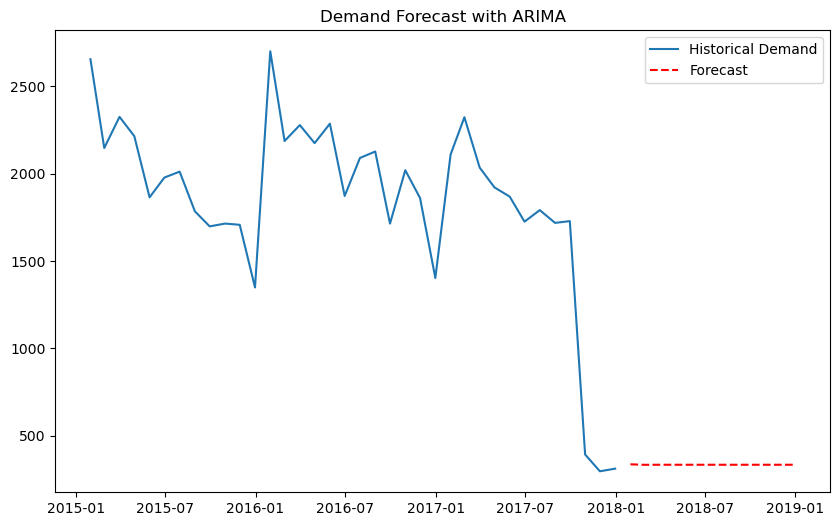

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_demand, label='Historical Demand')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.title('Demand Forecast with ARIMA')
plt.legend()
plt.show()

Machine Learning 

In [23]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
data['Month'] = data.index.month
data['Year'] = data.index.year
X = data[['Month', 'Year', 'Discount %', 'Lead Time (Days)']]
y = data['Order Quantity']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1.4644263712390533


Further Arima

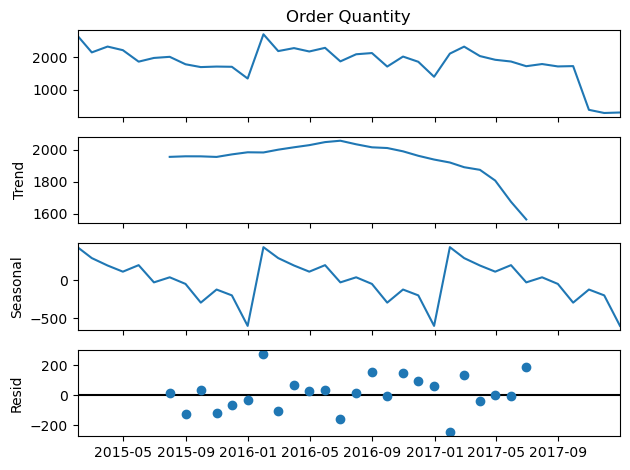

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(monthly_demand, model='additive')
result.plot()
plt.show()

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
model = SARIMAX(monthly_demand, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76809D+00    |proj g|=  6.92122D-02

At iterate    5    f=  4.75484D+00    |proj g|=  2.32584D-03

At iterate   10    f=  4.75446D+00    |proj g|=  2.95617D-04

At iterate   15    f=  4.75435D+00    |proj g|=  4.68166D-03

At iterate   20    f=  4.74927D+00    |proj g|=  8.96172D-03

At iterate   25    f=  4.74259D+00    |proj g|=  1.02218D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     36      1     0     0   

In [36]:
forecast = model_fit.forecast(steps=12)

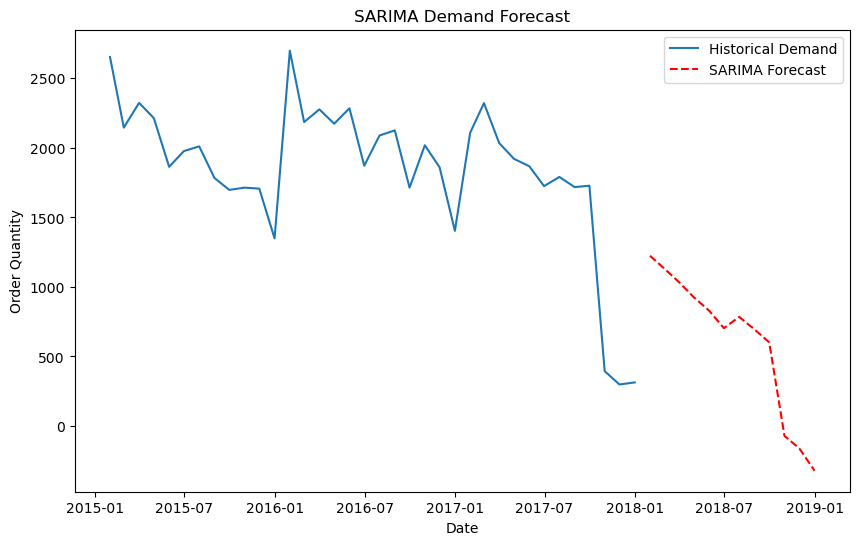

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_demand, label='Historical Demand')
plt.plot(forecast, label='SARIMA Forecast', linestyle='--', color='red')
plt.title('SARIMA Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend()
plt.show()

In [38]:
weekly_demand = data['Order Quantity'].resample('W').sum()

In [39]:
model = SARIMAX(monthly_demand, order=(1, 1, 1))

In [41]:
import numpy as np
log_demand = np.log(monthly_demand + 1)

In [42]:
diff_demand = monthly_demand.diff().dropna()

In [43]:
model = SARIMAX(log_demand, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86079D-01    |proj g|=  2.58916D-01

At iterate    5    f=  2.75465D-01    |proj g|=  4.03218D-03

At iterate   10    f=  2.75442D-01    |proj g|=  3.76133D-03

At iterate   15    f=  2.75334D-01    |proj g|=  1.37916D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     28      1     0     0   3.635D-05   2.753D-01
  F =  0.27531746285450615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [44]:
forecast_log = model_fit.forecast(steps=12)
forecast = np.exp(forecast_log) - 1 

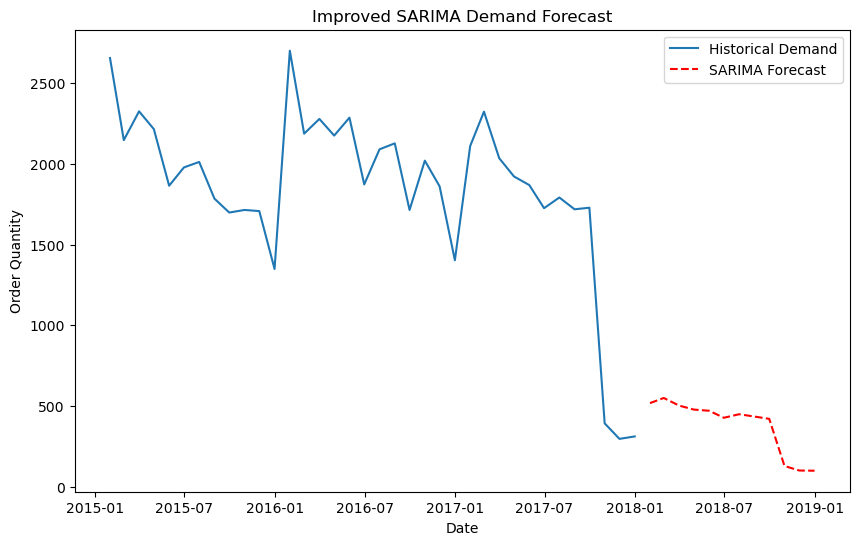

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_demand, label='Historical Demand')
plt.plot(forecast, label='SARIMA Forecast', linestyle='--', color='red')
plt.title('Improved SARIMA Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend()
plt.show()

In [48]:
train_data = monthly_demand[:-12]  # All data except the last 12 months
test_data = monthly_demand[-12:]  # Last 12 months as test data


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03189D+00    |proj g|=  2.54536D-02

At iterate    5    f=  3.02837D+00    |proj g|=  5.32994D-03

At iterate   10    f=  3.02811D+00    |proj g|=  2.23632D-03

At iterate   15    f=  3.02114D+00    |proj g|=  5.37845D-03

At iterate   20    f=  3.02093D+00    |proj g|=  1.24859D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   1.971D-05   3.021D+00
  F =   3.0209259005835363     

CONVERG

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


In [52]:
forecast = model_fit.forecast(steps=12)
actual = test_data

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(actual, forecast, squared=False)
mae = mean_absolute_error(actual, forecast)

In [54]:
print(f"RMSE: {rmse}, MAE: {mae}")

RMSE: 876.6070818247111, MAE: 678.9266699331495


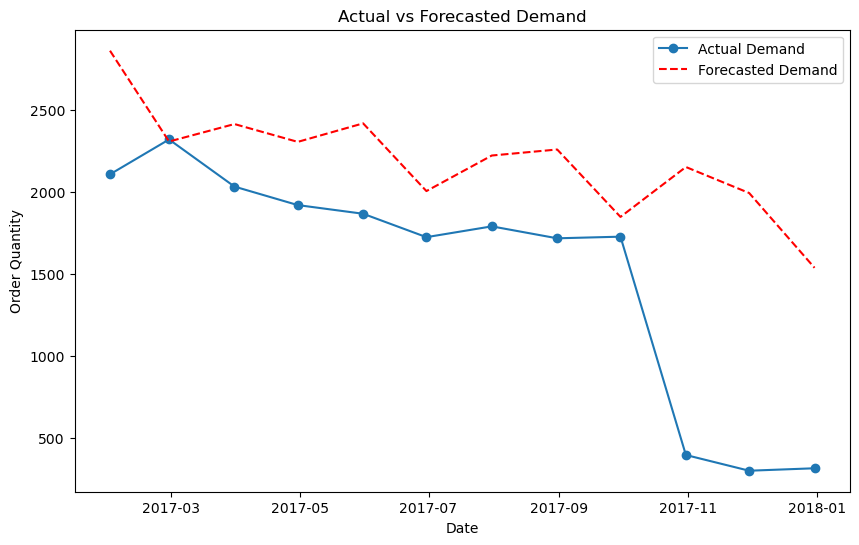

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual Demand', marker='o')
plt.plot(forecast, label='Forecasted Demand', linestyle='--', color='red')
plt.title('Actual vs Forecasted Demand')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend()
plt.show()

In [56]:
mape = np.mean(np.abs((actual - forecast) / actual)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 132.59%


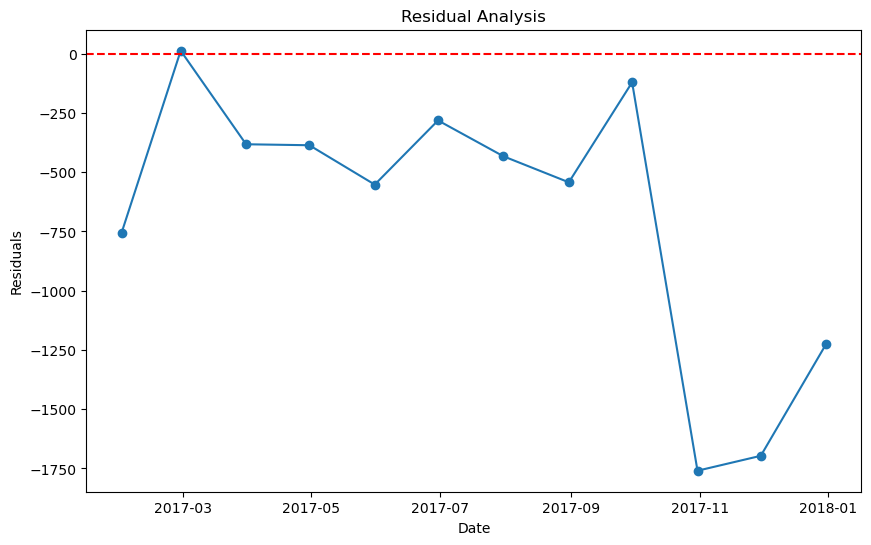

In [57]:
residuals = actual - forecast
plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

In [63]:
print(train_data.index)
print(exog_train.index)

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Order DateTime', freq='M')
DatetimeIndex(['2015-02-21 14:07:00', '2015-03-02 07:37:00',
               '2015-04-18 22:47:00', '2015-06-10 22:32:00',
               '2015-06-10 22:32:00', '2015-06-10 22:32:00',
               '2015-10-09 07:50:00', '2015-10-13 14:29:00',
               '2015-11-06 16:12:00', '2015-11-15 21:16:00',
               ...
               '2017-12-06 19:10:00', '2017-12-07 00:46:00',
               '2017-12-07 05:41:00', '2017-12-07 00:00:00',
               '2017-12-04 21:37:00', '2017-12-04 23:43:

In [66]:
print("Duplicate indices in train_data:", train_data.index.duplicated().sum())
print("Duplicate indices in exog_train:", exog_train.index.duplicated().sum())

Duplicate indices in train_data: 0
Duplicate indices in exog_train: 11598


In [67]:
exog_train = exog_train[~exog_train.index.duplicated(keep='first')]

In [69]:
exog_train = exog_train.reindex(train_data.index).fillna(0)
print(train_data.index.equals(exog_train.index))

True


In [59]:
exog = data[['Discount %', 'Gross Sales', 'Lead Time (Days)']]
train_data = monthly_demand[:-12]
test_data = monthly_demand[-12:]
exog_train = exog.iloc[:-12, :] 
exog_test = exog.iloc[-12:, :]

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data, exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
exog_test = exog_test.reindex(test_data.index).fillna(0)
forecast = model_fit.forecast(steps=12, exog=exog_test)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
print(forecast)

2017-01-31    2910.998121
2017-02-28    2552.037657
2017-03-31    2567.440279
2017-04-30    2332.364988
2017-05-31    2150.208770
2017-06-30    2213.130630
2017-07-31    2265.539181
2017-08-31    2062.226208
2017-09-30    1958.939906
2017-10-31    1969.416509
2017-11-30    1877.557931
2017-12-31    1603.579439
Freq: M, Name: predicted_mean, dtype: float64


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(test_data, forecast, squared=False)
mae = mean_absolute_error(test_data, forecast)
mape = (abs((test_data - forecast) / test_data)).mean() * 100

In [75]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

RMSE: 841.9896760392114
MAE: 686.8699681879676
MAPE: 128.4255769839918%


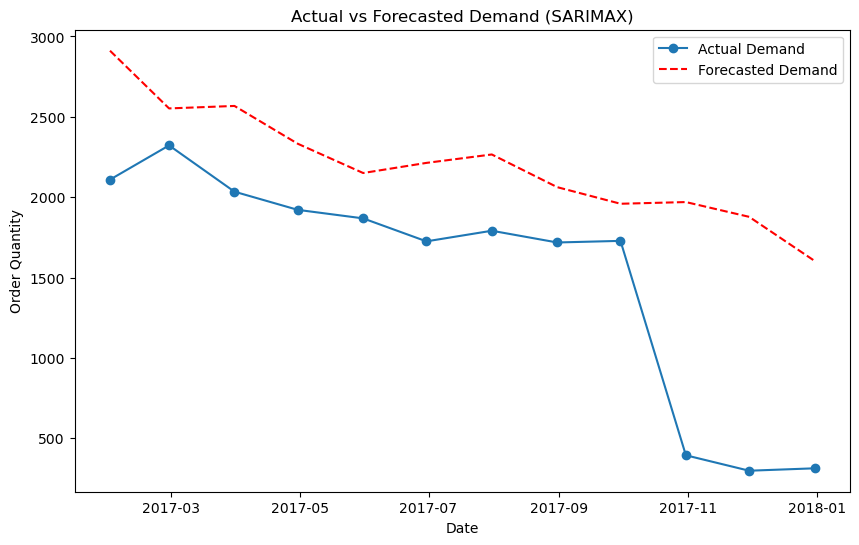

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual Demand', marker='o')
plt.plot(forecast, label='Forecasted Demand', linestyle='--', color='red')
plt.title('Actual vs Forecasted Demand (SARIMAX)')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend()
plt.show()

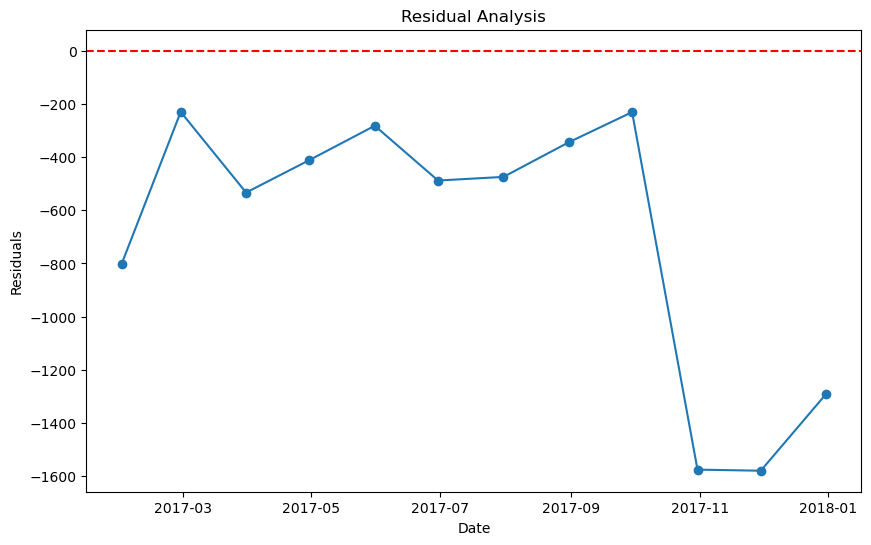

In [77]:
residuals = test_data - forecast

plt.figure(figsize=(10, 6))
plt.plot(residuals, marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


In [79]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [81]:
from pmdarima import auto_arima
auto_model = auto_arima(train_data, exogenous=exog_train, seasonal=True, m=12, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=345.660, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=349.941, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=348.980, Time=0.36 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=435.725, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=346.903, Time=0.35 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=350.345, Time=0.28 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=354.103, Time=1.02 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=354.188, Time=0.77 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=353.457, Time=0.08 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=345.771, Time=0.53 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=352.598, Time=0.89 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=356.057, Time=1.22 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=346.031, Time=0.63 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   

In [84]:
forecast = model_fit.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=12)

In [83]:
Reorder Point = (Forecasted Demand During Lead Time) + Safety Stock

SyntaxError: invalid syntax (3379541566.py, line 1)